# GRIP2020 @ THE SPARKS FOUNDATION
Name : S Lavanya
BATCH :GRIDEC'2020

Task 2: Prediction using Unsupervised Machine Learning¶

Note:
In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

In [1]:
#Step 1:import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#Step 2: Load the iris dataset
data = pd.read_csv('Iris.csv')
data.shape

(150, 6)

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Visualization 

Text(0.5, 1.0, 'scatter')

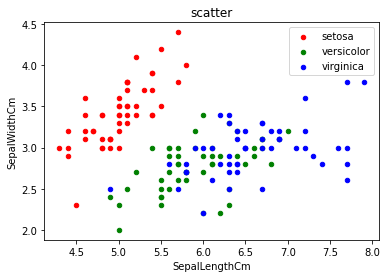

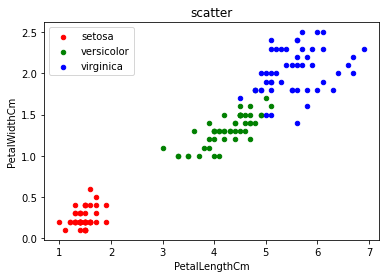

In [8]:
# scatter plot using pandas

ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

ax = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

### Data Preprocessing¶

In [9]:
#Features
X = data.drop(['Id','Species'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
#Labels
Y = data['Species'].map({'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2 })
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [11]:
X.shape,Y.shape

((150, 4), (150,))

#### Model Training

In [12]:
#Define the model for the algorithm
kmodel = KNeighborsClassifier(n_neighbors=3)

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=6)

In [14]:
xtest.shape

(45, 4)

In [15]:
kmodel.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

### Calculate the Training, testing and validation score

In [16]:
#Calculating training accuracy
Yptr = kmodel.predict(xtrain)
(Yptr == ytrain).mean()

0.9714285714285714

In [17]:
#calculating testing accuracy on unknown values for model
Ypts = kmodel.predict(xtest)
(Ypts == ytest).mean()

0.9555555555555556

In [18]:
# validation score
kmodel.score(xtest,ytest)

0.9555555555555556

In [19]:
Ypred = kmodel.predict(X)
Ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [20]:
# confusion matrix
confusion_matrix(Ypred,Y)

array([[50,  0,  0],
       [ 0, 48,  3],
       [ 0,  2, 47]], dtype=int64)

In a confusion matrix, the predicted class labels (0, 1, 2) are written along the top (column names). The true class labels (Iris-setosa, etc.) are written along the right side. Each cell in the matrix is a count of how many instances of a true class where classified as each of the predicted classes.

## Visualization of the model Cluster

Text(0.5, 1.0, "Model's classification")

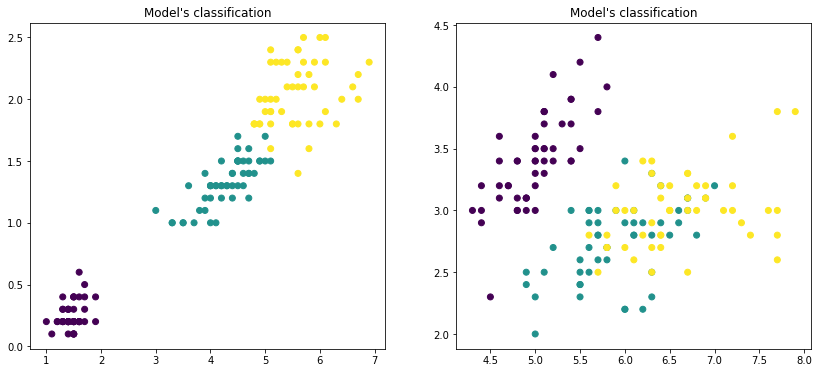

In [21]:
plt.figure(figsize=(14,6))

# visualizing the scatters
plt.subplot(1, 2, 1)
plt.scatter(X['PetalLengthCm'] ,X['PetalWidthCm'],c = Ypred)
plt.title('Model\'s classification')
plt.subplot(1, 2, 2)
plt.scatter(X['SepalLengthCm'] ,X['SepalWidthCm'],c = Ypred)
plt.title('Model\'s classification')

# Conclusion
I had done prediction using Unsupervised Machine Learning task and evaluated the model's clustering accuracy score.
Thank You !!!